In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [3]:
nfl_data = "Data/MergedNfl.csv"
nfl_df = pd.read_csv(nfl_data)
nfl_df

Player_Name  Total_Fantasy_Points Position
0          Aaron Rodgers                  48.1       QB
1         Deshaun Watson                  46.0       QB
2         Russell Wilson                  45.4       QB
3         Jameis Winston                  45.3       QB
4             Drew Brees                  43.6       QB
5            Aaron Jones                  42.2       RB
6    Christian McCaffrey                  41.7       RB
7         Russell Wilson                  41.0       QB
8         Saquon Barkley                  39.9       RB
9            Will Fuller                  39.7       WR
10          Daniel Jones                  39.6       QB
11        Jameis Winston                  39.3       QB
12         Lamar Jackson                  39.2       QB
13         Derrick Henry                  39.1       RB
14          Daniel Jones                  38.8       QB
15          Kenyan Drake                  38.6       RB
16         Sammy Watkins                  37.8       WR
17            Mike Evans                  37.0       WR
18          Stefon Diggs                  36.5       WR
19            Nick Chubb                  36.3       RB
20         Tevin Coleman                  35.8       RB
21           Aaron Jones                  34.6       RB
22   Christian McCaffrey                  34.6       RB
23         Austin Ekeler                  33.4       RB
24          Marvin Jones                  33.3       WR
25            Mike Evans                  31.8       WR
26        Christian Kirk                  31.8       WR
27          Keenan Allen                  30.6       WR
28          Chris Godwin                  30.4       WR
29        Michael Thomas                  30.2       WR
30                Eagles                  28.0  Defense
31              Patriots                  27.0  Defense
32         Darren Waller                  24.6       TE
33                 49ers                  23.0  Defense
34               Vikings                  23.0  Defense
35                 Colts                  23.0  Defense
36          Hunter Henry                  22.0       TE
37          Mark Andrews                  21.3       TE
38             Zach Ertz                  21.1       TE
39              Panthers                  21.0  Defense
40         Jason Sanders                  21.0        K
41            Jared Cook                  20.4       TE
42          Mike Gesicki                  20.2       TE
43                Ravens                  20.0  Defense
44              Redskins                  20.0  Defense
45                 Bears                  20.0  Defense
46            Greg Olsen                  19.5       TE
47          Jordan Akins                  19.3       TE
48        T.J. Hockenson                  19.1       TE
49            Buccaneers                  19.0  Defense
50         George Kittle                  18.9       TE
51           Kai Forbath                  17.0        K
52       Harrison Butker                  16.0        K
53          Younghoe Koo                  16.0        K
54          Younghoe Koo                  16.0        K
55           Matt Prater                  16.0        K
56            Dan Bailey                  15.0        K
57    Stephen Gostkowski                  15.0        K
58       Harrison Butker                  14.0        K
59       Harrison Butker                  14.0        K

In [63]:
nfl_df.dtypes

Player_Name              object
Total_Fantasy_Points    float64
Position                 object
dtype: object

In [64]:
nfl_df['Total_Fantasy_Points'] = nfl_df.Total_Fantasy_Points.astype(float)

In [82]:
nfl_mean = nfl_df.groupby('Position')['Total_Fantasy_Points'].mean()
nfl_mean.round(2)

Position
Defense    22.40
K          16.00
QB         42.63
RB         37.62
TE         20.64
WR         33.91
Name: Total_Fantasy_Points, dtype: float64

In [66]:
nfl_mean_df = pd.DataFrame({
    "QB": [42.68],
    "RB": [37.62],
    "WR": [33.91],
    "TE": [20.64],
    "Defense": [22.40],
    "K": [16.00]
})
nfl_mean_df

QB     RB     WR     TE  Defense     K
0  42.68  37.62  33.91  20.64     22.4  16.0

In [67]:
nfl_mean_df.set_index(['QB'])

RB     WR     TE  Defense     K
QB                                       
42.68  37.62  33.91  20.64     22.4  16.0

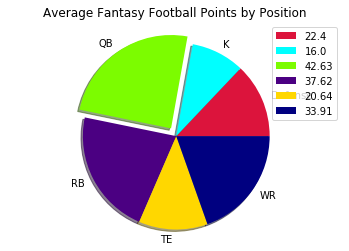

In [85]:
labels = ["Defense", "K", "QB", "RB", "TE", "WR"]
colors = ["crimson", "aqua", "lawngreen", "indigo", "gold", "navy"]
explode = [0,0,0.1,0,0,0]
plt.pie(
nfl_mean,
labels = labels,
colors=colors,
explode=explode,
shadow = True
)

plt.title("Average Fantasy Football Points by Position")
plt.legend(nfl_mean.round(2))
plt.axis('equal')

plt.savefig("Average Fantasy Football Points by Position.png")

plt.show()